# Analysis of CaM compact
## Comparison of all CaM states with Initial Frames Removed

Same analysis as compare_cmpcam.ipynb but ignore the first frames to test if this matters.

Removing 500 rows (10ps per row) from each independent traj (50ns)

In [1]:
import sys
import os
import pandas as pd
import numpy as np

# Add the lda directory to Python path
lda_path = os.path.join(os.getcwd(), 'lda')
if lda_path not in sys.path:
    sys.path.append(lda_path)

# Import the interactive pipeline functions
from pipeline_helper import run_interactive_pipeline, create_interactive_pipeline_configs, summarize_and_evaluate

# Import your existing data access module
from data_access import create_dataframe_factory, list_available_constructs_subconstructs

print("✅ Imports completed successfully!")

✅ Imports completed successfully!


In [2]:
data_dir = '/work/hdd/bfri/jjeong7/analysis_output/dist_maps'
constructs_dict, subconstructs_dict = list_available_constructs_subconstructs(base_dir=data_dir)

# Specific states of specific proteins
data_factory = create_dataframe_factory(
    base_dir=data_dir, 
    constructs=['calmodulin-compact'],
    apply_boundary_filter=True, # 🛠️ ACTIVATE TRANSFORMATION
    n_edge=3,
    min_frame=500,
)

In [3]:
# Create all possible pipeline combinations
configs = create_interactive_pipeline_configs()

🚀 Starting Interactive Pipeline Runner
💡 Variance runs first, then feature selection, then dimensionality reduction
⚙️  You'll set parameters for each phase

PHASE 1: VARIANCE


Found cached result for VARIANCE (pipeline_cache/variance.pkl). Load? (Y/n):  n



[VARIANCE]
⚙️  Hyperparameters:
  show_plot: True - Show variance plots for analysis
  knee_S: 1.0 - Knee detection sensitivity - higher = more features
  outlier_multiplier: 3.0 - Outlier detection threshold multiplier
  fallback_percentile: 90 - Fallback percentile for threshold
  min_clean_ratio: 0.5 - Min fraction of features to keep in 'clean' set before reverting to full data



Modify? (y/N):  n


Running VARIANCE...
Pass 1: Analyzing feature variance (Streaming from disk)...
📊 Filtered 120 files down to 40 matching criteria
Loaded 144 canonical residues from /work/hdd/bfri/jjeong7/analysis_output/dist_maps/calmodulin-compact/ca-mg-1-2/canonical_resids.npy
Variance statistics:
  Max variance: 23.573143
  Min variance: 0.002969
  Mean variance: 2.276579
  Median variance: 1.890959
  Total features: 9453
  ⚠️  Detected 106 outlier variances > 11.114587
  Top 5 outlier values: [np.float32(23.573143), np.float32(22.150879), np.float32(21.98215), np.float32(21.788998), np.float32(21.717663)]
  Using 9347 values for knee detection
  Knee detected at index 285 with threshold 6.741806
  Features above threshold: 391


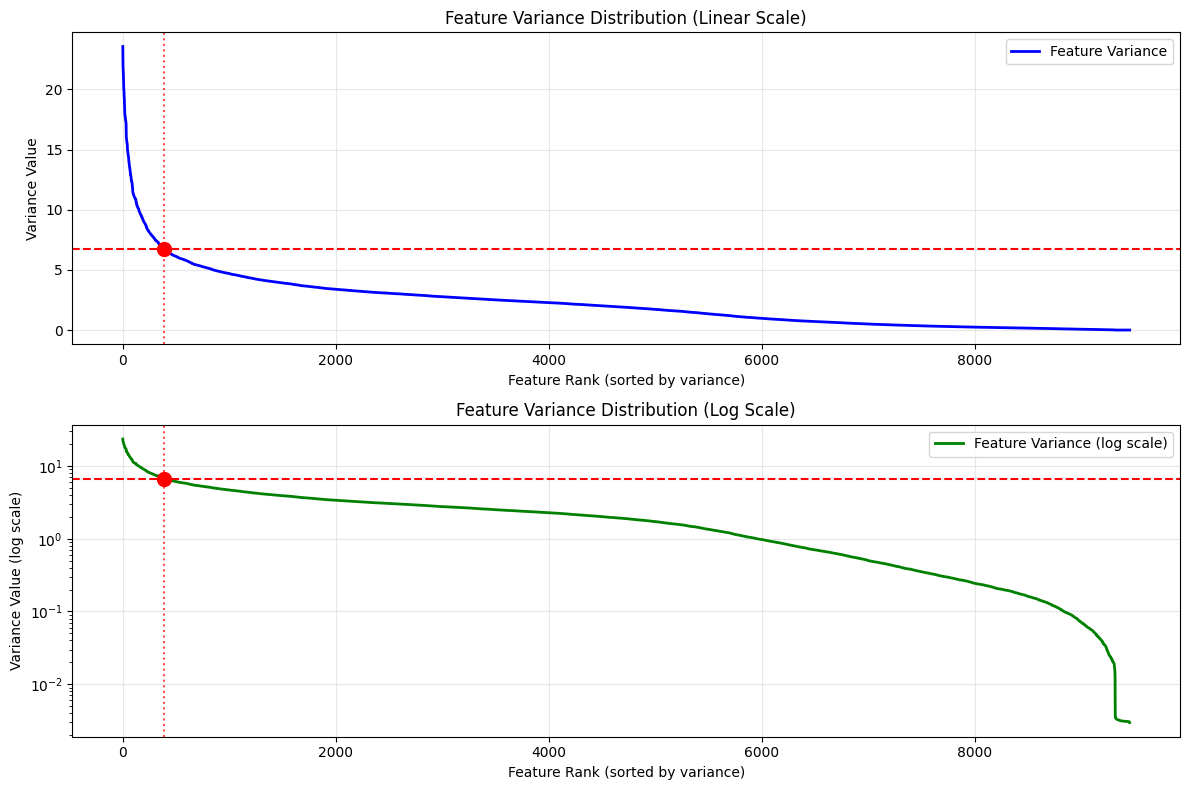

Pass 2: Filtering columns (Retaining 391 features)...
📊 Filtered 120 files down to 40 matching criteria
VARIANCE Result Shape: (70040, 396)



Accept VARIANCE results? (y/N):  y


Results accepted and cached to pipeline_cache/variance.pkl
Variance Output: (70040, 396)

CLASS ASSIGNMENT
Choose class assignment method:
1. Default: construct + subconstruct
2. GMM: Gaussian Mixture Model (shared states)
3. Spectral: Non-linear spectral clustering
4. TICA: Kinetic landscape state assignment


Enter choice (1-4):  1


Assigned 4 construct-based classes


Found cached result for CHI_SQ_AMINO (pipeline_cache/chi_sq_amino.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : CHI_SQ_AMINO]
📋 Parameter Controls:
  🔬 Method: Chi-square selection with AMINO reduction
⚙️  Hyperparameters:
  stride: 25 - Data sampling stride - higher = less memory usage
  max_amino: None - Target features (None = Dynamic selection via AMINO Distortion Jump method)
  q_bins: 5 - Quantile bins for chi-square - higher = more resolution
  sample_rows: 20000 - Sample size for binning - higher = more accurate bins
  knee_S: 5.0 - Sensitivity for the initial Chi-Square candidate knee - higher = more features



Modify? (y/N):  y
  stride [25]:  
  max_amino [None]:  
  q_bins [5]:  
  sample_rows [20000]:  
  knee_S [5.0]:  10


Running CHI_SQ_AMINO...
Successfully imported Optimized AMINO (Parallel)
Sampling to estimate Chi-Squared bin edges and classes...
Building Chi-Squared scores sequentially (stride=25)...
Knee Point: 221.4576 | Candidates: 182
Loading 182 features (stride=25)...
Running AMINO on 182 candidates...
AMINO: Dynamic feature selection enabled. Searching up to 40 clusters...
Selected bandwidth: 0.5859285486610032

Calculating all pairwise distances...
[########################################] | 100% Completed | 498.80 s
✅ Selected 4 final features.
📊 Generating AMINO diagnostic plots...


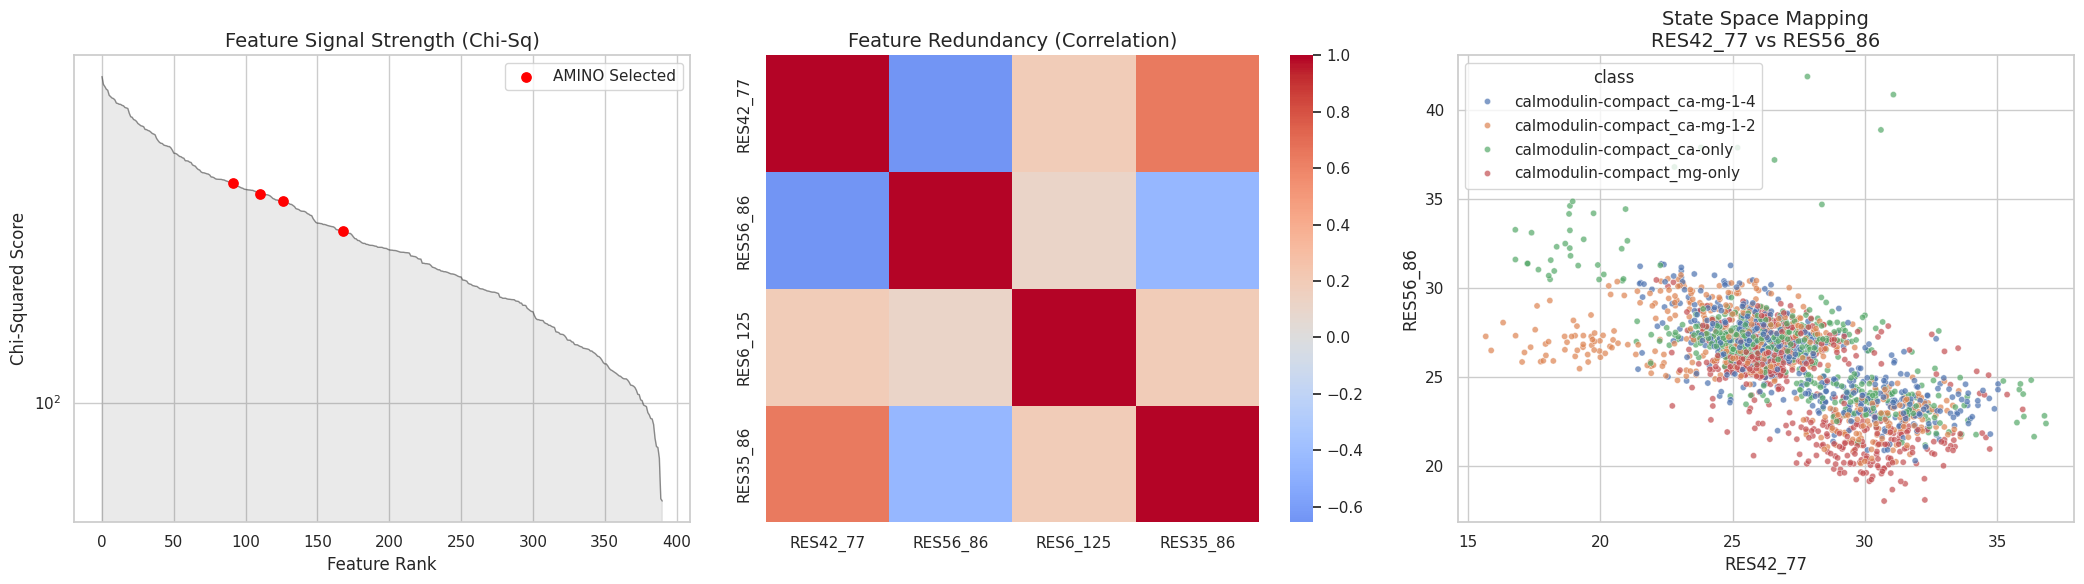

Pass 3: Extracting all rows for the 4 selected features...
Loading 4 features (stride=1)...
CHI_SQ_AMINO Result Shape: (70040, 8)



Accept CHI_SQ_AMINO results? (y/N):  y


Results accepted and cached to pipeline_cache/chi_sq_amino.pkl


Found cached result for FISHER_AMINO (pipeline_cache/fisher_amino.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : FISHER_AMINO]
📋 Parameter Controls:
  🔬 Method: Fisher scoring with AMINO dimensionality reduction
⚙️  Hyperparameters:
  max_outputs: None - Target features (None = Dynamic selection via AMINO Distortion Jump method)
  knee_S: 2.0 - Sensitivity for the initial Fisher candidate knee - higher = more features



Modify? (y/N):  n


Running FISHER_AMINO...
Successfully imported Optimized AMINO (Parallel)
Calculating Fisher scores sequentially...
Found classes: ['calmodulin-compact_ca-mg-1-2', 'calmodulin-compact_ca-mg-1-4', 'calmodulin-compact_ca-only', 'calmodulin-compact_mg-only']
Loading 28 candidate features into memory...
Running AMINO on 28 candidates...
AMINO: Dynamic feature selection enabled. Searching up to 40 clusters...
Selected bandwidth: 0.34266124718470986

Calculating all pairwise distances...
[########################################] | 100% Completed | 13.38 s
📊 Generating AMINO diagnostic plots...


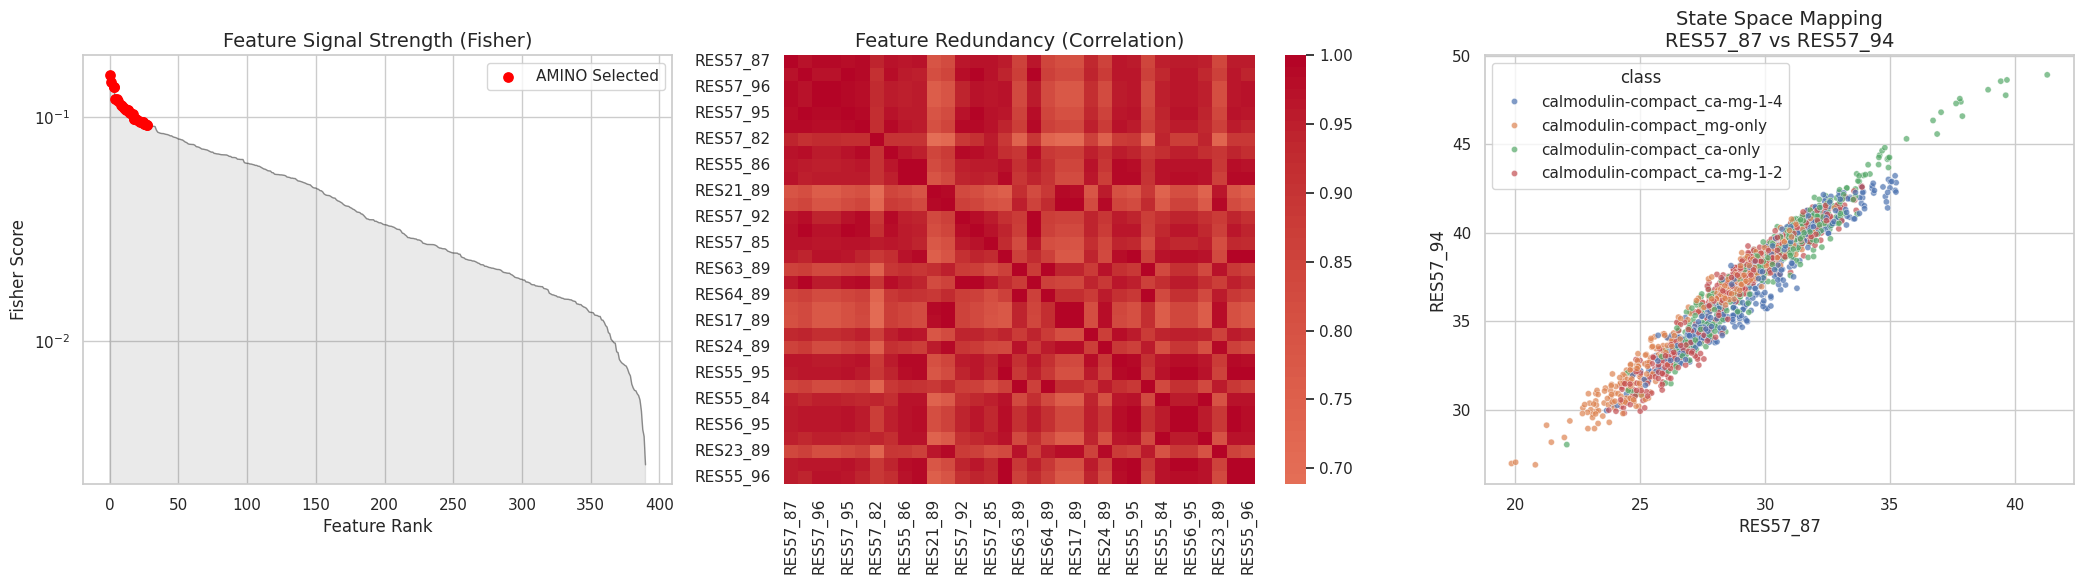

FISHER_AMINO Result Shape: (70040, 32)



Accept FISHER_AMINO results? (y/N):  y


Results accepted and cached to pipeline_cache/fisher_amino.pkl


Found cached result for MPSO (pipeline_cache/mpso.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : MPSO]
📋 Parameter Controls:
  🔬 Method: Multi-objective PSO - balances accuracy vs sparsity
⚙️  Hyperparameters:
  dims: None - Output dimensions (None = default 5)
  candidate_limit: None - Max features for optimization (None = Dynamic selection via Fisher Score Knee)
  knee_S: 2.0 - Sensitivity for the candidate filtering knee - higher = more features
  max_iter: 10 - PSO iterations - higher = better optimization
  population_size: 40 - Swarm population size - larger = better search
  alpha: 0.9 - Accuracy-sparsity tradeoff - 0.0=accuracy, 1.0=sparsity
  threshold: 0.5 - Feature selection threshold - higher = fewer features
  redundancy_weight: 0.2 - Dimension independence penalty (0.0=none, 1.0=max redundancy reduction)
  stride: 15 - Data sampling stride - higher = less data



Modify? (y/N):  y
  dims [None]:  
  candidate_limit [None]:  
  knee_S [2.0]:  
  max_iter [10]:  
  population_size [40]:  
  alpha [0.9]:  0.8
  threshold [0.5]:  0.7
  redundancy_weight [0.2]:  0.6
  stride [15]:  


Running MPSO...
Pass 1: Computing Fisher scores (stride=15)...
Dynamic candidate selection: Fisher score knee at index 58 (59 features)
MPSO: Output dimensions set to default (dims=5)
Pass 2: Loading search data (stride=15)...
Beginning Swarm Optimization on 4670 samples...
.........  > Evaluations completed: 50...
.........  > Evaluations completed: 100...
.........  > Evaluations completed: 150...
.........  > Evaluations completed: 200...
.........  > Evaluations completed: 250...
.........  > Evaluations completed: 300...
.........  > Evaluations completed: 350...
.........  > Evaluations completed: 400...
........
✅ Optimization complete.
Pass 3: Recovering all rows and applying projection...
📊 Generating MPSO diagnostic plots...


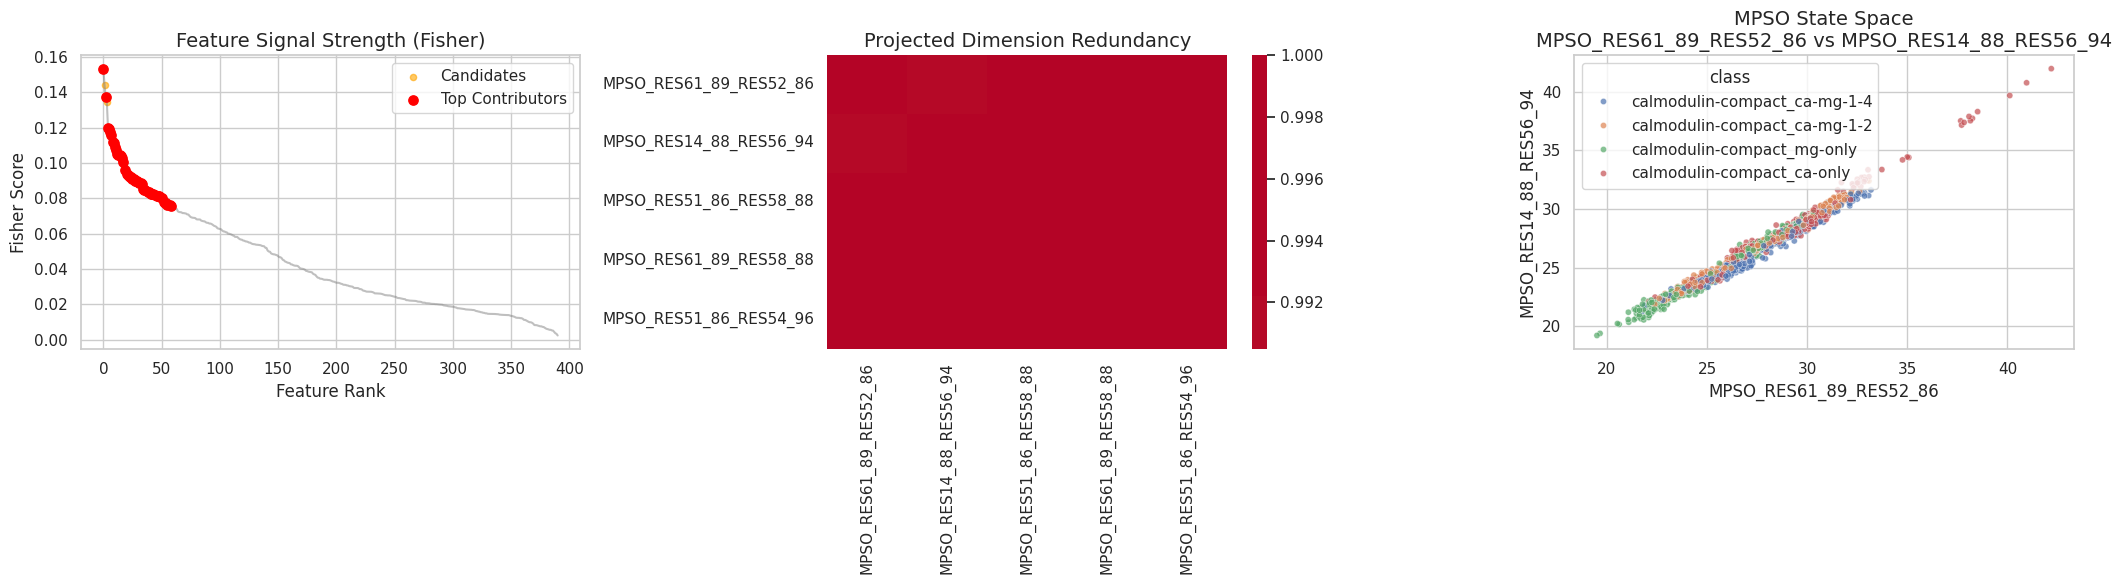

MPSO Result Shape: (70040, 11)



Accept MPSO results? (y/N):  y


Results accepted and cached to pipeline_cache/mpso.pkl


Found cached result for BPSO (pipeline_cache/bpso.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : BPSO]
📋 Parameter Controls:
  🔬 Method: Binary PSO - swarm intelligence for feature selection
⚙️  Hyperparameters:
  candidate_limit: None - Max features for optimization (None = Dynamic selection via Fisher Score Knee)
  knee_S: 2.0 - Sensitivity for the candidate filtering knee - higher = more features
  population_size: 20 - Swarm size - more particles = better exploration
  max_iter: 30 - Max iterations - higher = more optimization
  w: 0.729 - Inertia weight - controls exploration vs exploitation
  c1: 1.49445 - Cognitive parameter - individual learning influence
  c2: 1.49445 - Social parameter - swarm influence
  stride: 10 - Data sampling stride - higher = less data



Modify? (y/N):  n


Running BPSO...
Pass 1: Filtering features via Streaming Fisher Score (stride=10)...
Dynamic candidate selection: Fisher score knee at index 36 (37 features)
Pass 2: Loading 37 features (stride=10)...
Beginning Swarm Optimization on 7004 samples...
.........  > Evaluations completed: 50...
.........  > Evaluations completed: 100...
.........  > Evaluations completed: 150...
.........  > Evaluations completed: 200...
.........  > Evaluations completed: 250...
.........  > Evaluations completed: 300...
.........  > Evaluations completed: 350...
.........  > Evaluations completed: 400...
.........  > Evaluations completed: 450...
.........  > Evaluations completed: 500...
.........  > Evaluations completed: 550...
.........  > Evaluations completed: 600...
....
✅ Final selection: 18 features.


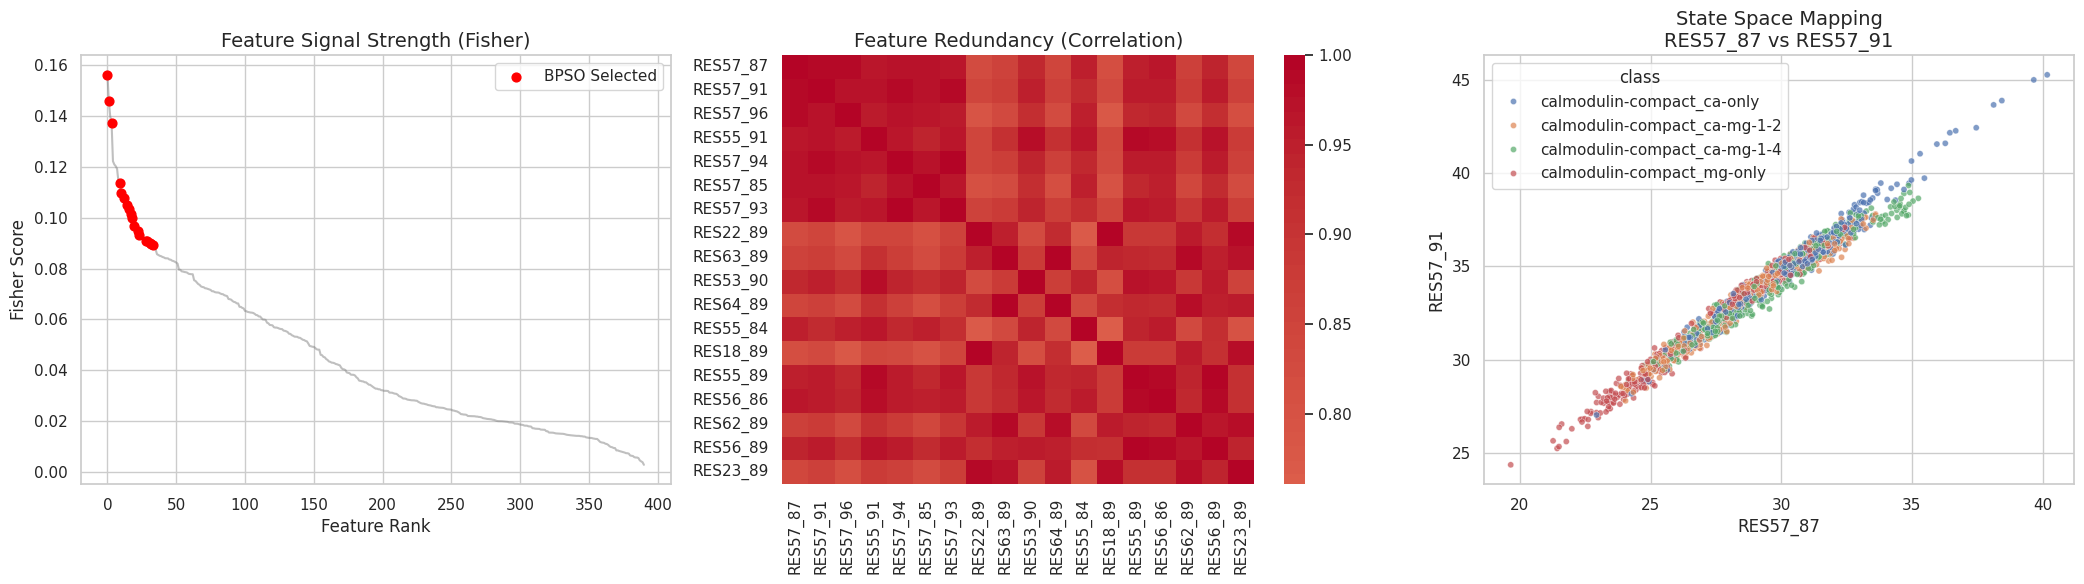

Pass 3: Recovering all rows for 18 features...
BPSO Result Shape: (70040, 24)



Accept BPSO results? (y/N):  y


Results accepted and cached to pipeline_cache/bpso.pkl

🤖 AUTOMATED DIMENSIONALITY REDUCTION PHASE


Found existing DR caches. Recompute ALL methods? (y/N):  y


No further interaction required. Results will be saved automatically.
🚀 Processing: BPSO ➔ FLDA
Performing SVD on 18 features...
Dynamic dimensionality selection: 2 components capture 95% scatter variance
Selected features (18): ['RES57_87', 'RES57_91', 'RES57_96', 'RES55_91', 'RES57_94', 'RES57_85', 'RES57_93', 'RES22_89', 'RES63_89', 'RES53_90']...
Result: SUCCESS (Saved to bpso_to_flda.pkl)
🚀 Processing: BPSO ➔ PCA
Dynamic dimensionality selection: target = 95% variance
Shape before PCA:  (70040, 18)
Shape after PCA: (70040, 2) (Captured 97.06% variance)
Variances: [132.58936779   6.9465249 ]
Variance ratios: [0.92229368 0.04832013]
Selected features (18): ['RES57_87', 'RES57_91', 'RES57_96', 'RES55_91', 'RES57_94', 'RES57_85', 'RES57_93', 'RES22_89', 'RES63_89', 'RES53_90']...
Result: SUCCESS (Saved to bpso_to_pca.pkl)
🚀 Processing: BPSO ➔ ZHLDA
ZHLDA Dynamic selection: 3 components capture 95% generalized scatter
ZHLDA: Optimizing 18 features...
Selected features (18): ['RES57_87'

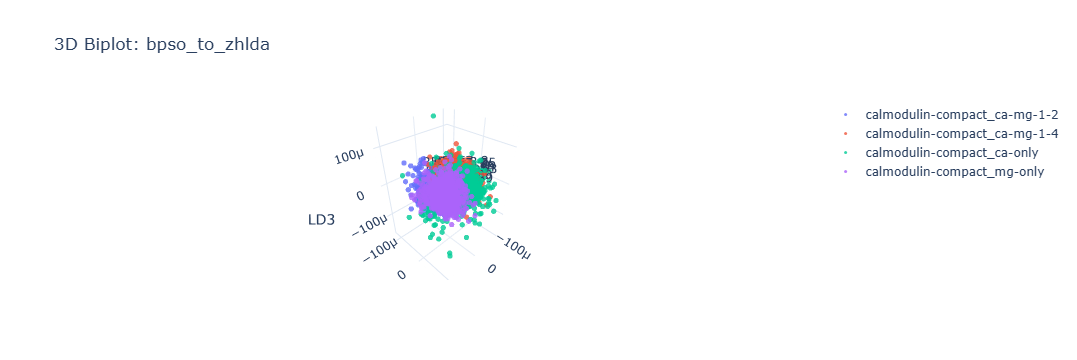

----------------------------------------------------------------------------------------------------
2     | fisher_amino_to_zhlda     | 0.3818       | 3
      📉 Selection Stats: 26 numeric features available for mapping.
      ↳ LD1 (67.6%): RES57_87 (-0.32), RES57_91 (-0.29), RES57_96 (-0.28), RES57_82 (-0.26), RES57_89 (-0.24)
      ↳ LD2 (15.1%): RES55_84 (-0.13), RES64_89 (-0.09), RES55_87 (-0.09), RES53_90 (-0.08), RES63_89 (-0.07)
      ↳ LD3 (17.4%): RES57_91 (-0.20), RES57_87 (-0.18), RES57_96 (-0.18), RES22_89 (-0.18), RES53_90 (-0.17)


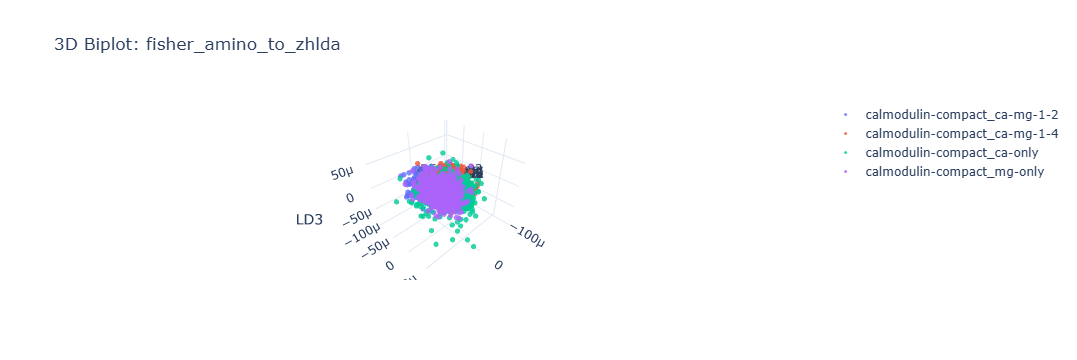

----------------------------------------------------------------------------------------------------
3     | mpso_to_zhlda             | 0.2286       | 3
      📉 Selection Stats: 52 numeric features available for mapping.
      ↳ LD1 (58.6%): RES57_82 (-0.36), RES57_87 (-0.31), RES57_86 (-0.30), RES57_85 (-0.29), RES57_88 (-0.26)
      ↳ LD2 (17.7%): RES21_89 (-0.40), RES18_89 (-0.38), RES17_89 (-0.38), RES22_89 (-0.36), RES23_89 (-0.31)
      ↳ LD3 (23.7%): RES57_82 (0.42), RES57_85 (0.31), RES57_87 (0.25), RES14_89 (-0.25), RES57_86 (0.25)


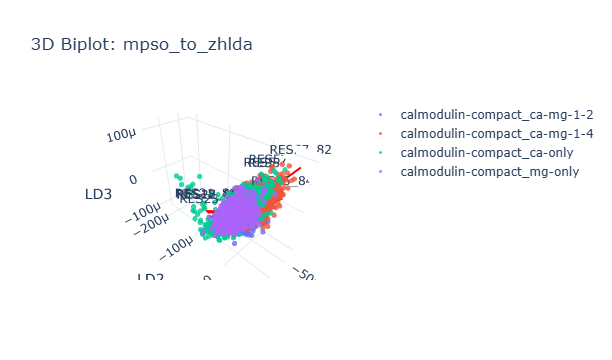

----------------------------------------------------------------------------------------------------
4     | fisher_amino_to_flda      | 0.1111       | 2
      📉 Selection Stats: 26 numeric features available for mapping.
      ↳ LD1 (38.8%): RES55_86 (0.99), RES57_89 (0.98), RES55_91 (0.98), RES57_91 (0.98), RES57_94 (0.98)
      ↳ LD2 (61.2%): RES21_89 (0.59), RES17_89 (0.58), RES18_89 (0.58), RES22_89 (0.56), RES23_89 (0.53)
----------------------------------------------------------------------------------------------------
5     | fisher_amino_to_pca       | 0.1100       | 2
      📉 Selection Stats: 26 numeric features available for mapping.
      ↳ PC1 (38.5%): RES55_86 (0.98), RES57_89 (0.98), RES55_91 (0.98), RES57_91 (0.98), RES57_94 (0.98)
      ↳ PC2 (61.5%): RES21_89 (0.43), RES17_89 (0.42), RES18_89 (0.42), RES22_89 (0.40), RES23_89 (0.36)
----------------------------------------------------------------------------------------------------
6     | bpso_to_flda              |

In [4]:
print("🚀 Starting Interactive Pipeline Runner")
print("💡 Variance runs first, then feature selection, then dimensionality reduction")
print("⚙️  You'll set parameters for each phase")

# Use the pipeline runner
results, base_df = run_interactive_pipeline(data_factory, configs)

In [6]:
import pickle
from pathlib import Path

export_dir = Path("results/cmpcam_frames_removed")
export_dir.mkdir(parents=True, exist_ok=True)

try:
    with open(export_dir / "pipeline_results.pkl", "wb") as f:
        # Protocol 5 is faster and handles larger objects better
        pickle.dump(results, f, protocol=pickle.HIGHEST_PROTOCOL)

    with open(export_dir / "base_df_metadata.pkl", "wb") as f:
        pickle.dump(base_df, f, protocol=pickle.HIGHEST_PROTOCOL)
        
    print(f"✅ State preserved in {export_dir}/")
except Exception as e:
    print(f"❌ Save failed: {e}")

✅ State preserved in results/cmpcam_frames_removed/
